In [20]:
# Import libraries
import requests 
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO

def get_price_com(query):
    # Open web page
    URL = "https://www.price.com.hk/search.php?g=A&q=" + query
    r = requests.get(URL)
    soup = BeautifulSoup(r.text)
    
    # Get total number of page
    page_str = ""
    for i in soup.find('div',{'class':'pagination-bottom-center'}).findAll('a')[-1]['onclick']:
        if i.isdigit(): page_str = page_str + i
    total_page = int(page_str)
    
    # Set up product library
    product_lib = {}

    # Scrape from page 1 to last page 
    for page in range(1, total_page + 1):
        if page > 1:
            URL = "https://www.price.com.hk/search.php?g=A&q="+query+'&page=' + str(page)
            r = requests.get(URL)
            soup = BeautifulSoup(r.text)
        product_list = soup.find('ul',{'tag':'product-list'})
        li = product_list.findAll('li')
        for product in li:
            # Skip invalid line
            if product.find('input') == None: continue
            if not 'data-add-compare-name' in product.find('input').attrs: continue
            # Scrape Product Name
            product_name = product.find('input')['data-add-compare-name']
            # Set up library to store product features
            feature_lib = {}
            # Scrape Price
            price_lib = {}
            price_range = []
            spans = product.findAll('span')
            for span in spans:
                if 'data-price' in span.attrs:
                    price_range.append(float(span['data-price']))
                if 'class' in span.attrs and span['class'] == ['product-prop']:
                    if span.find('img') != None: 
                        product_prop = span.find('img')['title']
                    else: product_prop = "其他"
                    price_lib[product_prop] = price_range
                    price_range = []
                feature_lib['price'] = price_lib
            # Scrape Rating
            rating = product.find('span',{'class':'product-rating'})
            if rating != None:
                feature_lib['rating'] = rating.find('img')['alt']
            # Scrape Spec
            trs = product.findAll('tr')
            spec_lib = {}
            for tr in trs:
                spec_lib[tr.find('td',{'class':'attr-label'}).text] = tr.find('span').text
            if len(spec_lib) > 0: feature_lib['spec'] = spec_lib
            # Scrape Caption
            caption = product.find('span',{'class':'product-caption'})
            if caption != None:
                feature_lib['caption'] = caption.text
            # Scrape Image
            if product.find('div',{'class':'line line-img'}).find('img') != None:
                image_r = requests.get(url = "https://www.price.com.hk/" + product.find('div',{'class':'line line-img'}).find('img').attrs['src'])
                feature_lib['img'] = Image.open(BytesIO(image_r.content))    
            # Save feature to product library with product name as the key
            product_lib[product_name] = feature_lib
    
    # Return product library
    return product_lib

In [28]:
dyson_list = get_price_com('dyson')

In [29]:
dyson_list['Dyson Supersonic 風筒 HD15']['spec']

{'功率:': '1600W',
 '電源線長度:': '2.8m',
 '風速調節:': '3',
 '熱風模式:': '4',
 '冷風功能:': '有',
 '負離子護髮功能:': '有'}

In [30]:
dyson_list['Dyson V8 Slim Fluffy 無線吸塵機']['price']

{'行貨': [2480.0, 3180.0], '水貨': [2290.0, 2780.0]}

In [31]:
dyson_list['Dyson Digital Slim Origin 輕量無線吸塵機']['rating']

'10'

In [32]:
dyson_list['Dyson Purifier Hot+Cool Gen1 三合一暖風空氣清新機 HP10']['caption']

'(自動感應、有效捕捉灰塵、致敏原、細菌及H1N1 病毒7，帶來更潔淨的空氣。 \xa0全室淨化，為你吹送暖風或涼風。 \xa0全機密封符合HEPA H13標準。 \xa0去除99.95％小至PM 0.1 的微粒。)'

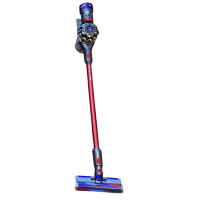

In [36]:
dyson_list['Dyson V8 Slim Fluffy 無線吸塵機']['img']

In [34]:
dyson_list['Dyson V15 Detect Total Clean 智能無線吸塵機']

{'price': {'行貨': [4780.0, 5780.0], '水貨': [3980.0]},
 'rating': '10',
 'spec': {'類型:': '直立式',
  '無線:': '是',
  '吸力:': '230AW',
  '集塵方式:': '塵盒',
  '集塵量:': '0.54公升',
  '除塵蟎:': '有',
  '尺寸:': '266 x 1086 x 250mm',
  '重量:': '2.61kg'},
 'caption': '(精準角度的雷射光使硬地板上隱藏的微塵清晰可見。内置壓電式聲學感應器( LCD)可持續偵測微粒大小和數量，並在需要時自動增加吸力。)',
 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200>}

In [35]:
print(dyson_list)

{'Dyson Supersonic 風筒 HD15': {'price': {'行貨': [2650.0, 3678.0]}, 'rating': '9.8', 'spec': {'功率:': '1600W', '電源線長度:': '2.8m', '風速調節:': '3', '熱風模式:': '4', '冷風功能:': '有', '負離子護髮功能:': '有'}, 'caption': '(顏色: 銀銅色 / 桃紅色 / 黑鋼色)', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x11241C9D0>}, 'Dyson Supersonic 風筒 普魯士藍冬日限定版 HD08': {'price': {'行貨': [2700.0, 3280.0], '水貨': [3880.0]}, 'rating': '10', 'spec': {'功率:': '1600W', '風速調節:': '3', '冷風功能:': '有', '負離子護髮功能:': '有'}, 'img': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=200x200 at 0x11529CA90>}, 'Dyson Gen5Detect Absolute 無線吸塵機': {'price': {'行貨': [4760.0, 6520.0]}, 'rating': '9.6', 'spec': {'類型:': '直立式,手提式', '無線:': '是', '吸力:': '262AW', '集塵方式:': '塵盒', '集塵量:': '0.77公升', '尺寸:': '1276 x 276 x 250mm', '重量:': '3.2kg'}, 'caption': '(G5 Detect Absolute)', 'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=200x200 at 0x114DDA190>}, 'Dyson V8 Slim Fluffy 無線吸塵機': {'price': {'行貨': [2480.0, 3180.0], '水貨': [2290.0, 2780.